In [33]:
%load_ext autoreload
%autoreload 2
%run ./initializer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1) already exists in sys.path


In [34]:
import torch
import torch.nn as nn
import optuna
from sklearn.model_selection import train_test_split
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from data_loading import DataPreprocessor
from random_forest_classifier_2a import plot_predicted_vs_actual

In [35]:
data_loader = DataPreprocessor()
train_df, pred_df = data_loader.load_and_preprocess_data("1d", 0.5, 1, do_bucketing=False, for_RNN_model=False)

Removed 52 outliers from 1268 observations. Percentage: 4.10%


In [42]:
test_predictions = []
test_actuals = []
final_predictions = []
user_ids = []

# For each user
for id in train_df["id"].unique():
    train_group = train_df[train_df["id"] == id]

    # Keep date column for evaluation
    dates = train_group['date']

    # Then drop id, mood, and date for features
    features = train_group.drop(columns=['id', 'mood', 'date'])
    labels = train_group['mood']
    X_train, X_test, y_train, y_test, dates_train, dates_val = train_test_split(
        features, labels, dates, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_test_pred = model.predict(X_test)
    test_predictions.extend(y_test_pred)
    test_actuals.extend(y_test)

    # Predict on the prediction set
    pred_group = pred_df[pred_df["id"] == id]
    X_pred = pred_group.drop(columns=["id", "date", "mood"])
    y_pred = model.predict(X_pred)

    final_predictions.append(y_pred[0])
    user_ids.append(id)


Validation Statistics
MAE: 0.5171586666666669
MSE: 0.5303554853333338
R²: -0.02743076219547569


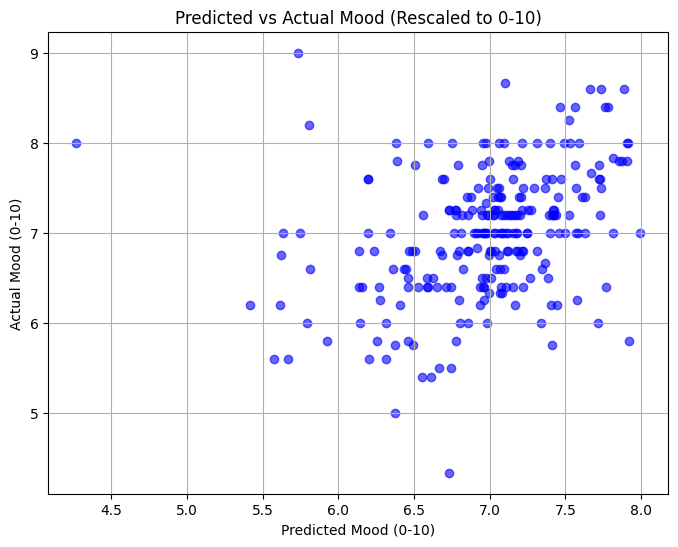

In [43]:
# Evaluate across all users
print("Validation Statistics")
print("MAE:", mean_absolute_error(test_actuals, test_predictions))
print("MSE:", mean_squared_error(test_actuals, test_predictions))
print("R²:", r2_score(test_actuals, test_predictions))
plot_predicted_vs_actual(np.array(test_actuals), np.array(test_predictions))

In [38]:
# Optional: view predictions
results_df = pd.DataFrame({
    "user_id": user_ids,
    "predicted_next_day_mood": final_predictions,
})
print(results_df)

    user_id  predicted_next_day_mood
0   AS14.01                 7.532500
1   AS14.02                 5.856167
2   AS14.03                 7.659667
3   AS14.05                 6.795667
4   AS14.06                 7.070000
5   AS14.07                 4.187833
6   AS14.08                 6.748333
7   AS14.09                 7.132667
8   AS14.12                 6.229000
9   AS14.13                 7.890833
10  AS14.14                 7.040667
11  AS14.15                 7.070000
12  AS14.16                 6.917000
13  AS14.17                 7.142500
14  AS14.19                 5.903833
15  AS14.20                 6.903000
16  AS14.23                 8.150000
17  AS14.24                 7.051667
18  AS14.25                 7.219500
19  AS14.26                 7.036000
20  AS14.27                 7.121333
21  AS14.28                 6.713500
22  AS14.29                 7.720000
23  AS14.30                 7.784500
24  AS14.31                 7.064833
25  AS14.32                 7.159167
2